`palettecleanser` is a python library that allows single line conversions between images and colormaps for data visualization. `palettecleanser` supports `matplotlib`, `seaborn`, and `plotly` libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Introduction

In [2]:
from functions import convert_to_cmap
from classes import CMap

`palettecleanser` reads files into a native `CMap` object. This handles the parsing and extraction of colors into colormaps. Later wrapper functions will enable single line functionality, but for displaying all cmaps generated from an image, interacting with the base `CMap` object is easiest

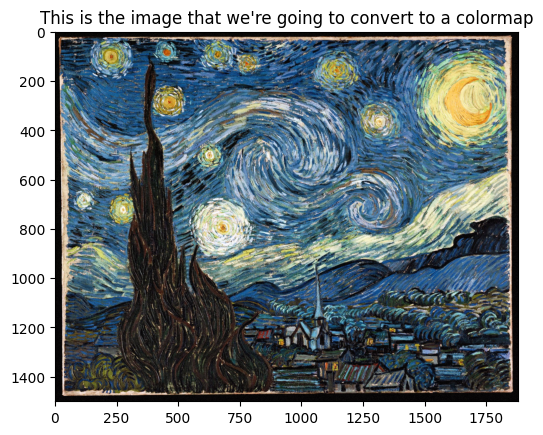

In [3]:
fname = 'vangogh.jpg'
plt.imshow(plt.imread(f'images/{fname}'))
plt.title("This is the image that we're going to convert to a colormap")
plt.show()

To convert to a colormap, load the image into a `CMap` object. The `CMap` object enables displaying of all generatable colormaps via. the `display_all_cmaps` method. 

Attributes such as numbers of colors generated (`n_colors`) can be adjusted via. the class initialization call.

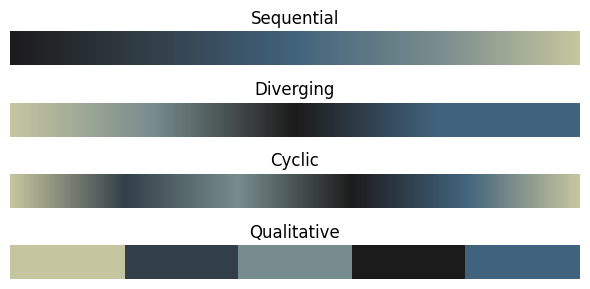

In [4]:
# display all colormaps available
vangogh_obj = CMap(f'images/{fname}')
vangogh_obj.display_all_cmaps()

For a one-line conversion of an image to a colormap, the `convert_to_cmap` function can be used

In [5]:
# one-liner for conversion of image to cmap
vangogh = convert_to_cmap(f'images/{fname}')

## Examples plots

#### The following cell applies a single color map to multiple different plot types & libraries

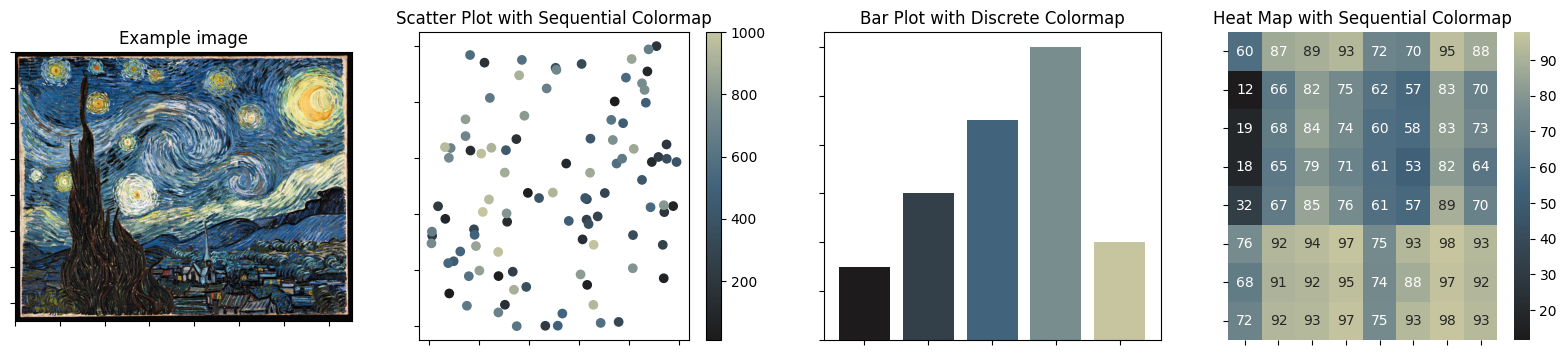

In [6]:
# Example plot applying single color map to multiple plot types across matplotlib & seaborn

# Convert image to cmap
vangogh = convert_to_cmap(f'images/{fname}')

# Generate subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
axes[0].imshow(plt.imread(f'images/{fname}'))
axes[0].set_title('Example image')


# Scatter Plot - Sequential Colormap
s = axes[1].scatter(np.random.rand(100), np.random.rand(100), c=range(10,1010,10), cmap=vangogh)
axes[1].set_title('Scatter Plot with Sequential Colormap')
fig.colorbar(s, ax=axes[1])

# Bar Plot - Discrete Colormap
colors = vangogh(np.linspace(0, 1, 5))
axes[2].bar(['cat', 'dog', 'fish', 'owl', 'whale'], [15, 30, 45, 60, 20], color=colors)
axes[2].set_title(f'Bar Plot with Discrete Colormap')

# Heat Map - Sequential Colormap
axes[3] = sns.heatmap(sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score"), annot=True, cmap=vangogh)
axes[3].set_title('Heat Map with Sequential Colormap')

# Turn off all labels
for ax in axes:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(False)

plt.show()

### matplotlib

Because the different libraries contain different representations of colormaps, `palettecleanser` CMaps can be initialized with a `library` argument to specify which library the colormap is going to be used with.

In [7]:
vangogh_mpl = convert_to_cmap(f'images/{fname}', library='matplotlib')

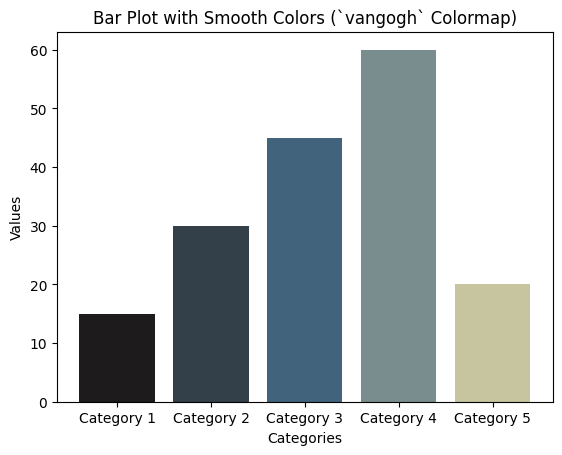

In [8]:
# example bar plot
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [15, 30, 45, 60, 20]

colors = vangogh_mpl(np.linspace(0, 1, len(categories)))
plt.bar(categories, values, color=colors)
plt.title(f'Bar Plot with Smooth Colors (`vangogh` Colormap)')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

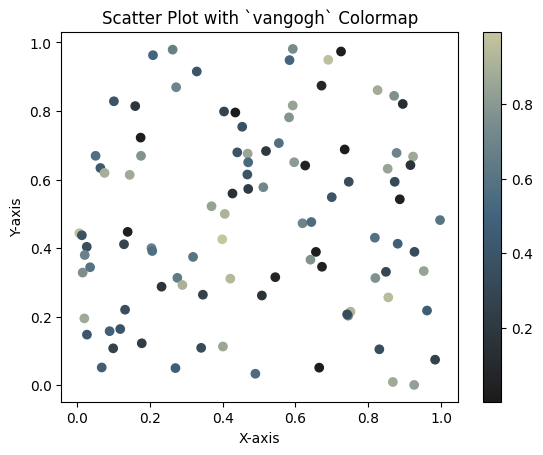

In [9]:
# example scatter plot
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)  # Defining colors based on data range
plt.scatter(x, y, c=colors, cmap=vangogh_mpl)
plt.colorbar()
plt.title('Scatter Plot with `vangogh` Colormap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### seaborn

In [10]:
vangogh_sns = convert_to_cmap(f'images/{fname}', library='seaborn')

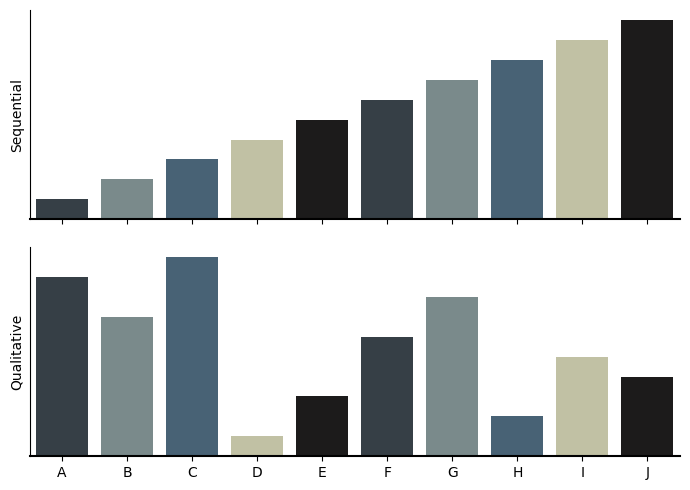

In [11]:
# example bar plot - https://seaborn.pydata.org/examples/palette_choices.html
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

rs = np.random.RandomState(8)
# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, hue=x, palette=vangogh_sns, ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Randomly reorder the data to make it qualitative
y2 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y2, hue=x, palette=vangogh_sns, ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)


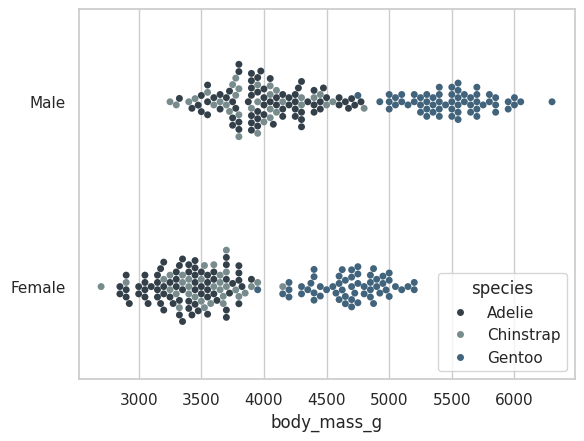

In [12]:
# example scatterplot - https://seaborn.pydata.org/examples/scatterplot_categorical.html

sns.set_theme(style="whitegrid", palette=vangogh_sns)
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="")
plt.show()


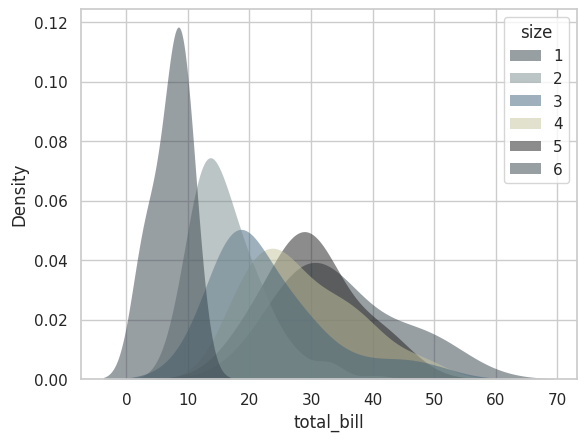

In [13]:
# example KDE plot - https://seaborn.pydata.org/generated/seaborn.kdeplot.html
tips = sns.load_dataset("tips")
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette=vangogh_sns,
   alpha=.5, linewidth=0,
)
plt.show()

### Plotly

In [14]:
vangogh_px = convert_to_cmap(f'images/{fname}', library='plotly')

In [15]:
df = px.data.iris()
df["e"] = df["sepal_width"]/100
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", color_discrete_sequence=vangogh_px)
fig.show()

In [16]:
import pandas as pd
df = px.data.medals_long()
# add some example data to increase color palettet
df2 = pd.DataFrame([['Antarctica', 'gold', 10]], columns=['nation','medal','count'])
df3 = pd.DataFrame([['Atlantis', 'bronze', 4]], columns=['nation','medal','count'])

df = pd.concat([df, df2, df3])

fig = px.bar(df, x="medal", y="count", color="nation", color_discrete_sequence=vangogh_px)
fig.show()
